# Imports

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.io as pio
from time import time
from IPython.display import Image
from IPython.core.display import HTML 

pio.templates.default = 'plotly_white'
pd.set_option('display.float_format', '{:.5f}'.format)

# Read data

In [2]:
df = pd.read_csv("../data/interim/creditcard_int.csv")
df = df.reindex(sorted(df.columns), axis=1)

# Data Science pre-data-checks

1) Understand what our data means

2) Understand completeness of data

3) Understand distribution of data 

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Amount,Class,Time,V1,V10,V11,V12,V13,V14,V15,...,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9
0,149.62000,0,0.00000,-1.35981,0.09079,-0.55160,-0.61780,-0.99139,-0.31117,1.46818,...,-0.18911,0.13356,-0.02105,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379
1,2.69000,0,0.00000,1.19186,-0.16697,1.61273,1.06524,0.48910,-0.14377,0.63556,...,0.12589,-0.00898,0.01472,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543
2,378.66000,0,1.00000,-1.35835,0.20764,0.62450,0.06608,0.71729,-0.16595,2.34586,...,-0.13910,-0.05535,-0.05975,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465
3,123.50000,0,1.00000,-0.96627,-0.05495,-0.22649,0.17823,0.50776,-0.28792,-0.63142,...,-0.22193,0.06272,0.06146,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702
4,69.99000,0,2.00000,-1.15823,0.75307,-0.82284,0.53820,1.34585,-1.11967,0.17512,...,0.50229,0.21942,0.21515,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774


- Every row is a transaction with the amount in some unit of currency, with time being the seconds between each transaction vs first in dataset

- All V# are PCA transformed see 1.1-pca-notes-jd.ipynb

- Class is the response 1 if fraud, else 0

In [5]:
# Checking nulls
df.isna().sum()

Amount    0
Class     0
Time      0
V1        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V2        0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
dtype: int64

In [6]:
df.describe()

,Amount,Class,Time,V1,V10,V11,V12,V13,V14,V15,...,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,...,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,88.34962,0.00173,94813.85958,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,...,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000
std,250.12011,0.04153,47488.14595,1.95870,1.08885,1.02071,0.99920,0.99527,0.95860,0.91532,...,0.48223,0.40363,0.33008,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863
min,0.00000,0.00000,0.00000,-56.40751,-24.58826,-4.79747,-18.68371,-5.79188,-19.21433,-4.49894,...,-2.60455,-22.56568,-15.43008,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407
25%,5.60000,0.00000,54201.50000,-0.92037,-0.53543,-0.76249,-0.40557,-0.64854,-0.42557,-0.58288,...,-0.32698,-0.07084,-0.05296,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310
50%,22.00000,0.00000,84692.00000,0.01811,-0.09292,-0.03276,0.14003,-0.01357,0.05060,0.04807,...,-0.05214,0.00134,0.01124,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143
75%,77.16500,0.00000,139320.50000,1.31564,0.45392,0.73959,0.61824,0.66250,0.49315,0.64882,...,0.24095,0.09105,0.07828,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714
max,25691.16000,1.00000,172792.00000,2.45493,23.74514,12.01891,7.84839,7.12688,10.52677,8.87774,...,3.51735,31.61220,33.84781,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499


- Amount and Time will need to be normalised or resolved

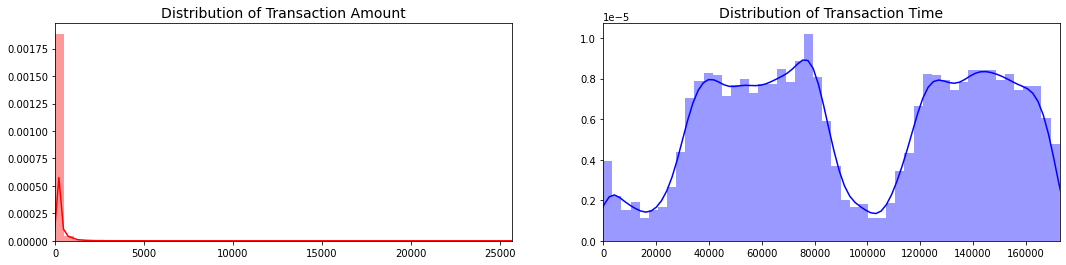

In [7]:
# Plot amount and time and check out their distributions
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

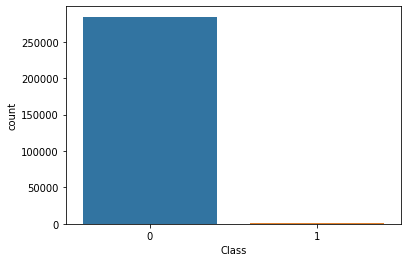

In [8]:
sns.countplot('Class', data=df)

In [9]:
print(f'# of Fraud cases: {df["Class"].sum()}')

# of Fraud cases: 492


In [10]:
print(f"% of Frauds: {np.round(df['Class'].sum()/df.shape[0],4)*100}%")
print(f"% of Not Fraud: {np.round(1-df['Class'].sum()/df.shape[0],4)*100}%")

% of Frauds: 0.16999999999999998%
% of Not Fraud: 99.83%


- Big yikes; need to balance the data out

# Scaling time and amount

In [11]:
from sklearn.preprocessing import RobustScaler

In [12]:
rob_scaler = RobustScaler()

In [13]:
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,Class,V1,V10,V11,V12,V13,V14,V15,V16,V17,...,V28,V3,V4,V5,V6,V7,V8,V9,scaled_amount,scaled_time
0,0,-1.35981,0.09079,-0.55160,-0.61780,-0.99139,-0.31117,1.46818,-0.47040,0.20797,...,-0.02105,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,1.78327,-0.99498
1,0,1.19186,-0.16697,1.61273,1.06524,0.48910,-0.14377,0.63556,0.46392,-0.11480,...,0.01472,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,-0.26982,-0.99498
2,0,-1.35835,0.20764,0.62450,0.06608,0.71729,-0.16595,2.34586,-2.89008,1.10997,...,-0.05975,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,4.98372,-0.99497
3,0,-0.96627,-0.05495,-0.22649,0.17823,0.50776,-0.28792,-0.63142,-1.05965,-0.68409,...,0.06146,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,1.41829,-0.99497
4,0,-1.15823,0.75307,-0.82284,0.53820,1.34585,-1.11967,0.17512,-0.45145,-0.23703,...,0.21515,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,0.67058,-0.99496


# Creating a baseline model with no sampling done

Purely for testing purposes so we can compare model metrics against baseline vs sampling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


Train: [     0      1      3 ... 284804 284805 284806] Test: [     2     20     24 ... 284791 284793 284798]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     3      9     13 ... 284794 284799 284803]
Train: [     0      1      2 ... 284801 284802 284803] Test: [    11     12     16 ... 284804 284805 284806]
Train: [     0      2      3 ... 284804 284805 284806] Test: [     1      4      6 ... 284796 284801 284802]
Train: [     1      2      3 ... 284804 284805 284806] Test: [     0      5      7 ... 284782 284790 284795]


In [15]:
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


# Resolving Class imbalances (undersampling vs oversampling)

- For undersampling: can use nearmiss, random undersampling

- For overampling: can use smote, random oversampling


## Undersampling

In [16]:
from imblearn.under_sampling import NearMiss 

r = 'random'
v = 1
nn = 3

#perform shuffling
df = df.sample(frac=1, replace=False, random_state=0, axis=0)

if r == 'random':

    # get equal amounts of class data
    fraud_df = df[df['Class']==1]
    non_fraud_df = df[df['Class']==0][:492]
    
    # bind the balanced class data together and shuffle
    undersampled_df = pd.concat([fraud_df,non_fraud_df])
    undersampled_df = undersampled_df.sample(frac=1, replace=False, random_state=0, axis=0)

    print(f'Class distribution undersampled dataset \n{undersampled_df.Class.value_counts()}')

    undersampled_df = undersampled_df.reindex(sorted(undersampled_df.columns), axis=1)
    
else:
    undersample = NearMiss(version=v, n_neighbors=nn)
    undersample_y = df[['Class']]
    undersample_x = df.drop('Class', axis=1)
    
    undersample_x, undersample_y = undersample.fit_resample(X,y)
    undersampled_df = undersample_x
    undersampled_df.insert(loc=0,column='Class', value=undersample_y)

Class distribution undersampled dataset 
1    492
0    492
Name: Class, dtype: int64


#### EDA on undersampled data vs baseline

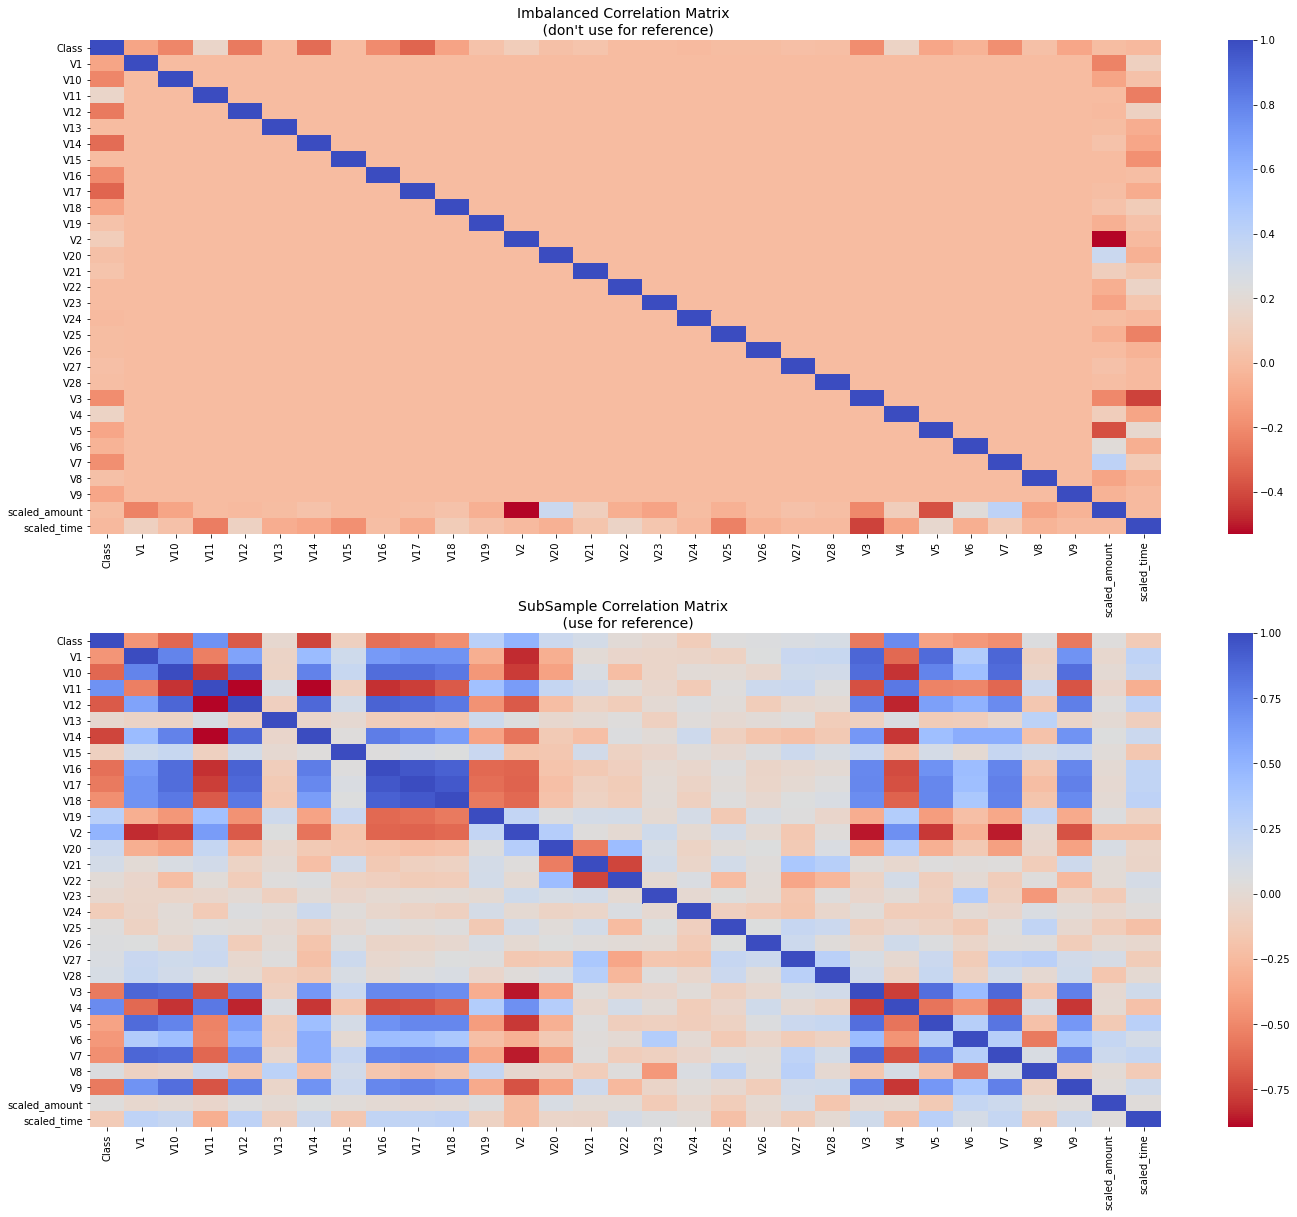

In [17]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
sns.heatmap(df.corr(), cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sns.heatmap(undersampled_df.corr(), cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

- Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

- Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

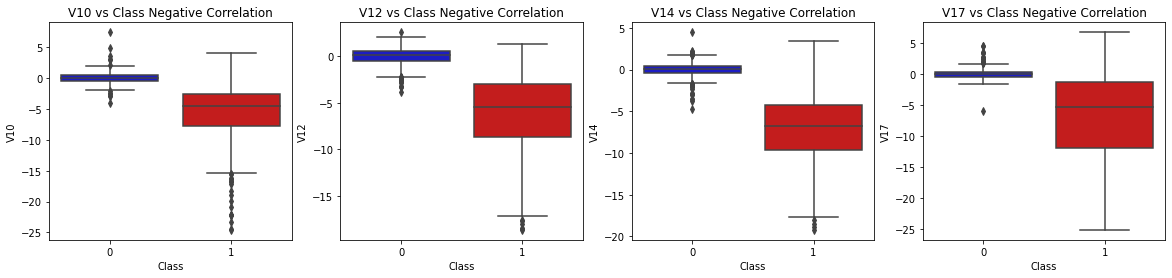

In [18]:
# Box plots to check class distributions out 
colors = ["#0101DF", "#DF0101"]

f, axes = plt.subplots(ncols=4, figsize=(20,4))

features_to_inspect = ['V10','V12','V14','V17']

for idx, feature in enumerate(features_to_inspect):
    sns.boxplot(x="Class", y=feature, data=undersampled_df, palette=colors, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Class Negative Correlation')

### Dealing with outliers

From the previous box plots we can see that there are extreme outliers from features that have high correlation with our classes. These needs to be resolved in order to improve model predictions

Methods of dealing with outliers:

- IQR method, create a threshold beyond 75% and 25% quartile and anything outside of those ranges shall be removed from the data set

- NN solutions like dbscan

Outlier Removal Tradeoff:
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.


The Tradeoff: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy.

Steps:

Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.

Determining the threshold: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).

Conditional Dropping: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.

Boxplot Representation: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.


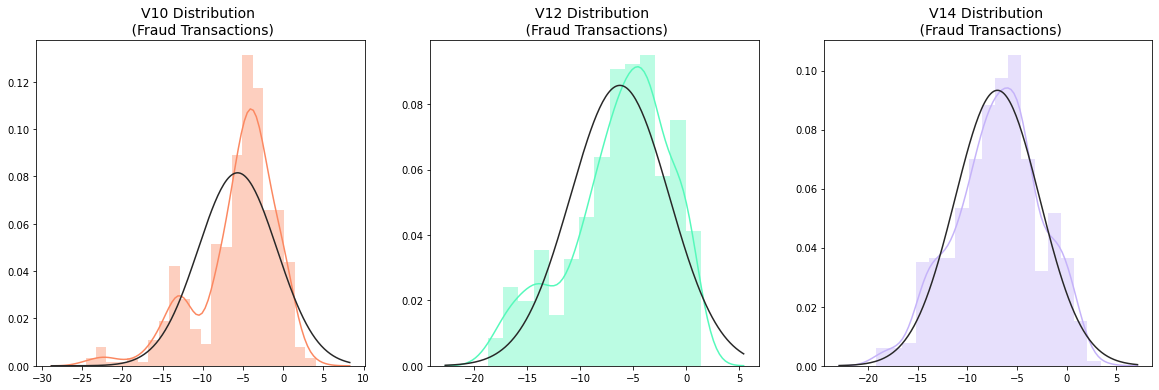

In [19]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
colors = ['#FB8861','#56F9BB','#C5B3F9'] 
features = ['V10','V12','V14']
axs  = [ax1, ax2, ax3]

for idx, f in enumerate(features):
    
    v_fraud_dist = undersampled_df[f].loc[undersampled_df['Class'] == 1].values
    sns.distplot(v_fraud_dist,ax=axs[idx], fit=norm, color=colors[idx])
    axs[idx].set_title(f'{f} Distribution \n (Fraud Transactions)', fontsize=14)


plt.show()

In [20]:
# removing outliers

for f in features:
    
    # get quartiles
    v_fraud = undersampled_df[f].loc[undersampled_df['Class'] == 1].values
    q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
    print(f'Quartile 25: {q25} | Quartile 75: {q75}')
    
    # find iqr, here it is 1.5 times the iqr
    v_iqr = q75 - q25
    print(f'iqr: {v_iqr}')
    
    # define a cutoff point and print of this information
    v_cut_off = v_iqr * 1.5
    v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
    print('Cut Off: {}'.format(v_cut_off))
    print(f'{f} Lower: {v_lower}')
    print(f'{f} Upper: {v_upper}')
    
    # Extra info to see outliers
    outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
    print(f'Feature {f} Outliers for Fraud Cases: {len(outliers)}')
    print(f'{f} outliers:{outliers} \n')
    
    # remove outliers
    undersampled_df = undersampled_df.drop(undersampled_df[(undersampled_df[f] > v_upper) | (undersampled_df[f] < v_lower)].index)
    

Quartile 25: -7.7566982278474725 | Quartile 75: -2.6141839131895623
iqr: 5.142514314657911
Cut Off: 7.713771471986866
V10 Lower: -15.47046969983434
V10 Upper: 5.099587558797303
Feature V10 Outliers for Fraud Cases: 19
V10 outliers:[-19.836148851696, -24.5882624372475, -15.563791338730098, -22.1870885620007, -18.9132433348732, -22.1870885620007, -17.141513641289198, -22.1870885620007, -15.563791338730098, -20.949191554361104, -16.3035376590131, -16.6011969664137, -18.2711681738888, -16.6496281595399, -24.403184969972802, -23.2282548357516, -16.2556117491401, -16.7460441053944, -22.1870885620007] 

Quartile 25: -8.46396612952571 | Quartile 75: -2.82494562476694
iqr: 5.63902050475877
Cut Off: 8.458530757138156
V12 Lower: -16.922496886663865
V12 Upper: 5.633585132371216
Feature V12 Outliers for Fraud Cases: 13
V12 outliers:[-18.047596570821604, -17.1504052507291, -17.631606313870698, -18.553697009645802, -17.003289445516, -17.7691434633638, -17.1829184301947, -18.683714633344298, -17.22866

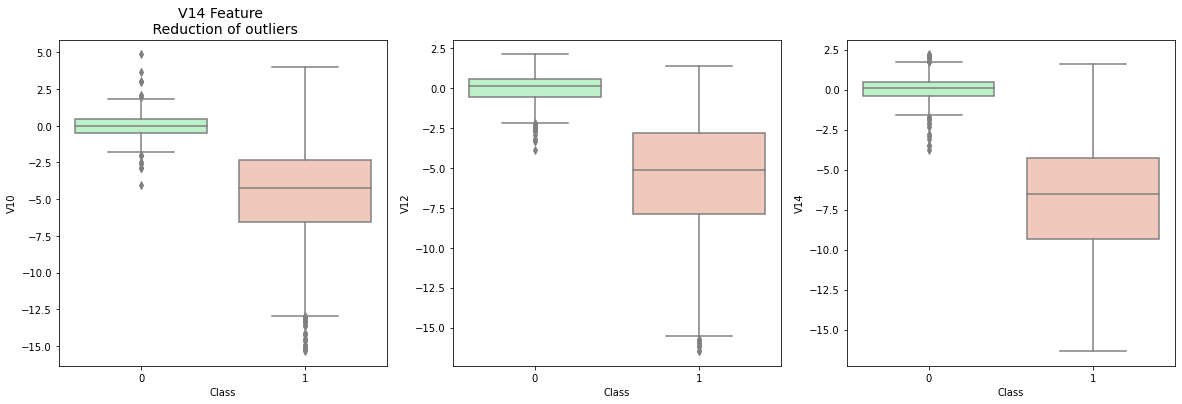

In [21]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

axs  = [ax1, ax2, ax3]
colors = ['#B3F9C5', '#f9c5b3']

# Boxplots with outliers removed
for idx, f in enumerate(features):
    sns.boxplot(x="Class", y=f, data=undersampled_df,ax=axs[idx], palette=colors)
    ax1.set_title(f"{f} Feature \n Reduction of outliers", fontsize=14)

plt.show()

### Post outlier removing clustering and visualisation to get a sense of how predictive models will perform in separating cases in undersampled data

In [22]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

In [23]:
X_undersample = undersampled_df.drop('Class', axis=1)
y_undersample = undersampled_df['Class']

n_comp=2
random_seed=0
dim_reduce_models = {
    'tsne': TSNE(n_components=n_comp, random_state=random_seed),
    'pca': PCA(n_components=n_comp, random_state=random_seed),
    'svd': TruncatedSVD(n_components=n_comp, algorithm='randomized', random_state=random_seed)
}

dim_reduce_fitted_models = {}

# T-SNE Implementation
for model in dim_reduce_models.keys():
    t0 = time()
    dim_reduce_fitted_models[model] = dim_reduce_models[model].fit_transform(X_undersample.values)
    t1 = time()
    print(f"{model.upper()} took {t1 - t0} s")


TSNE took 3.7288713455200195 s
PCA took 0.02335524559020996 s
SVD took 0.016385316848754883 s


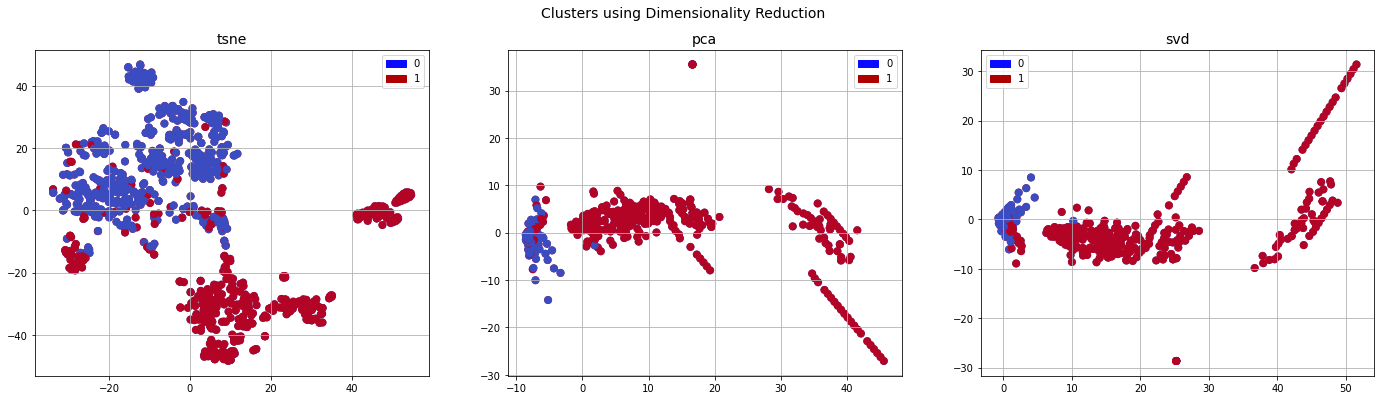

In [24]:
# Visualise the clustering

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
axs = [ax1,ax2,ax3]

labels = {
    'No Fraud': 0, 
    'Fraud': 1
}

blue_patch = mpatches.Patch(color='#0A0AFF', label=labels['No Fraud'])
red_patch = mpatches.Patch(color='#AF0000', label=labels['Fraud'])

for idx, model in enumerate(dim_reduce_fitted_models.keys()):
    axs[idx].set_title(f'{model}', fontsize=14)
    axs[idx].grid(True)
    axs[idx].legend(handles=[blue_patch, red_patch])
    
    for label in labels.keys():
        axs[idx].scatter(
            dim_reduce_fitted_models[model][:,0], 
            dim_reduce_fitted_models[model][:,1], 
            c=(y_undersample == labels[label]), 
            cmap='coolwarm', 
            label=label, 
            linewidths=2
        )
    
plt.show()

Compared random undersampling and near miss, the data visualisations show that random undersampling has a more distinguishable split between fraud and non-fraud cases.

Bear in mind that with this method we need to take into account of data leakage problem when validating a model since we undersample before cross validating

## Oversampling 

A popular and state-of-the-art oversampling method is SMOTE.

When training model with undersampling (with random) or with some oversampling method (not SMOTE) a common validation method is k-fold cross validation.

If you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem.

The wrong way:

In [27]:
Image(url= "https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401")

If we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. 

The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before,

The right way:

In [28]:
Image(url= "https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372")

SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.